In [219]:
import sys
sys.path.append("../")

from skimage.io import imread, imsave
import numpy as np
import matplotlib.pyplot as plt

In [244]:
from analyser.tracer import Tracer
from analyser.cell import Cell
from analyser.mask_feature import MaskFeature
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


##### load image and mask

In [221]:
movie = imread("../../data_test/YAV2104xYAV2105_005_13_R3D.dv.tif")
mask = imread("../../data_test/mask_YAV2104xYAV2105_005_13_R3D.tif").astype(np.int16)

In [222]:
ter = Tracer(mask)

#### tracing

In [223]:
out = ter.tracing(max_age=2, min_hits=0,iou_threshold=0.7)
p3d, coords = ter.cell_features_to_3dmatrix()
ter.connect_generation()
tracingdata = ter.update_traced_image()

100%|███████████████████████████████████████████| 50/50 [00:05<00:00,  9.89it/s]


In [253]:
pred = ter.prediction(movie, n_components=2)

In [225]:
distance = ter.cell_distance_3d()

100%|███████████████████████████████████████████| 50/50 [00:31<00:00,  1.57it/s]


In [252]:
son, mated = ter.fusion_cell_features()

55


55


In [247]:
a

,identity,generation,start_time,end_time,mother,father,is_divided,daughter_1,daughter_2,is_fusioned,spouse,son,life_time,arg,channel_prediction,center_distance,nearnest_distance,angle_x,angle_y,timegap
55,55,2,44.0,49.0,10.0,54.0,NaN,NaN,NaN,NaN,NaN,NaN,6.0,54,1.0,0.0,0.0,-1.735215,-1.256406,-43.0


#### show result

In [236]:
ter.maskobj[0].get_outline([3002]).values[0][:,3]

array([380.28947368, 181.21052632])

In [182]:
ter.cell_property

,identity,generation,start_time,end_time,mother,father,is_divided,daughter_1,daughter_2,is_fusioned,spouse,son,life_time,arg,channel_prediction
31,31,1,0.0,49.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.0,0,2.0
30,30,1,0.0,49.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.0,1,1.0
29,29,1,0.0,49.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.0,2,1.0
28,28,1,0.0,49.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.0,3,1.0
27,27,1,0.0,49.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.0,4,1.0
26,26,1,0.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,5,2.0
25,25,1,0.0,49.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.0,6,2.0
24,24,1,0.0,49.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.0,7,1.0
23,23,1,0.0,49.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.0,8,1.0
22,22,1,0.0,49.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.0,9,1.0


In [84]:
a = ter.trace_calendar.copy()
a = a.fillna(0)
a["frame_000"].values.astype(int)

array([3002, 3001, 1037, 1034, 1032, 1031, 1030, 1028, 1027, 1025, 1024,
       1023, 1022, 1021, 1020, 1019, 1018, 1015, 1014, 1013, 1012, 1011,
       1010, 1009, 1008, 1007, 1006, 1005, 1004, 1002, 1001,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0])

100%|███████████████████████████████████████████| 50/50 [00:31<00:00,  1.58it/s]


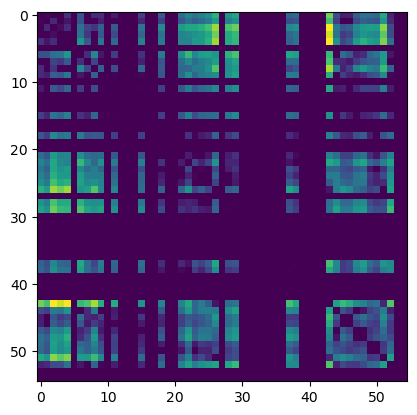

In [18]:
plt.imshow(distance[36,:,:,1])

In [19]:
ter.fusioned_cell_features()

55


AttributeError: 'Series' object has no attribute 'pred'

In [20]:
ter.cell_property

,identity,generation,start_time,end_time,mother,father,is_divided,daughter_1,daughter_2,is_fusioned,spouse,son,life_time,arg
31,31,1,0.0,49.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.0,0
30,30,1,0.0,49.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.0,1
29,29,1,0.0,49.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.0,2
28,28,1,0.0,49.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.0,3
27,27,1,0.0,49.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.0,4
26,26,1,0.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,5
25,25,1,0.0,49.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.0,6
24,24,1,0.0,49.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.0,7
23,23,1,0.0,49.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.0,8
22,22,1,0.0,49.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.0,9


In [ ]:
ter.cell_property.loc[(~self.cell_property.mother.isna()) & (~self.cell_property.father.isna())].copy()


In [156]:
ter.distance.shape

(50, 55, 55, 2)

In [165]:
ter.fusion_cell_features()

55


AttributeError: 'Series' object has no attribute 'pred'

In [161]:
ter.distance

array([[[[  0.        ,   0.        ],
         [ 47.98415663,   5.03092927],
         [ 64.17515075,   2.54950976],
         ...,
         [  0.        ,   0.        ],
         [  0.        ,   0.        ],
         [  0.        ,   0.        ]],

        [[ 47.98415663,   5.03092927],
         [  0.        ,   0.        ],
         [101.7910834 ,  47.77315395],
         ...,
         [  0.        ,   0.        ],
         [  0.        ,   0.        ],
         [  0.        ,   0.        ]],

        [[ 64.17515075,   2.54950976],
         [101.7910834 ,  47.77315395],
         [  0.        ,   0.        ],
         ...,
         [  0.        ,   0.        ],
         [  0.        ,   0.        ],
         [  0.        ,   0.        ]],

        ...,

        [[  0.        ,   0.        ],
         [  0.        ,   0.        ],
         [  0.        ,   0.        ],
         ...,
         [  0.        ,   0.        ],
         [  0.        ,   0.        ],
         [  0.        ,   0